In [1]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import StratifiedKFold
import pandas as pd
import matplotlib.pyplot as plt
import scipy.special as special
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LinearRegression
import seaborn as sns
import re
import sklearn
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import scale
from sklearn.feature_selection import RFE
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

#t-1 and t-2 values
data_1 = pd.read_csv(r'D:\user\OneDrive\Desktop\data_mining\thunderstorm-1.csv').drop(['Var_tot_tot_indx',
                                                                                                    'binary_thunderstorm',
                                                                                                    'binary_severe_thunderstorm','Totals_idx_cat'],axis=1)
data_1=data_1.dropna()

features_1=data_1.drop('target+1',axis=1)
target_1=data_1['target+1']


#manual train test split
features_train_1 = pd.read_csv(r'D:\user\OneDrive\Desktop\data_mining\thunderstorm_final_train.csv').drop(['Unnamed: 0','Var_tot_tot_indx',
                                                                                                    'binary_thunderstorm',
                                                                                                    'binary_severe_thunderstorm','Totals_idx_cat'],axis=1)

features_train_1=features_train_1.dropna()
target_train_1=features_train_1['target+1']
features_train_1=features_train_1.drop('target+1',axis=1)

features_test_1=pd.read_csv(r'D:\user\OneDrive\Desktop\data_mining\test_final_thunderstorm.csv').drop(['Unnamed: 0','Var_tot_tot_indx',
                                                                                                    'binary_thunderstorm',
                                                                                                    'binary_severe_thunderstorm','Totals_idx_cat'],axis=1)
features_test_1=features_test_1.dropna()
target_test_1=features_test_1['target+1']
features_test_1=features_test_1.drop('target+1',axis=1)


#all features 
all_f = pd.read_csv(r'D:\user\OneDrive\Desktop\data_mining\final_data_for_classification.csv').drop(['Unnamed: 0','Var_tot_tot_indx',
                                                                                                    'binary_thunderstorm',
                                                                                                    'binary_severe_thunderstorm','Totals_idx_cat'],axis=1)
all_f=all_f.dropna()
all_f_features=all_f.drop('target+1',axis=1)
all_f_target=all_f['target+1']



#highest covariance approach
features_cov = pd.DataFrame()
features_cov['var_Convective_inhibition']=all_f['var_Convective_inhibition']
features_cov['mean_surface_upward_sensible_heat_flux']=all_f['mean_surface_upward_sensible_heat_flux']
features_cov ['var_surface_air_pressure'] =all_f['var_surface_air_pressure']
features_cov['mean_Cloud_base_height']=all_f['mean_Cloud_base_height']
features_cov['mean_Convective_inhibition']=all_f['mean_Convective_inhibition']
features_cov['mean_Zero_degree_level']=all_f['mean_Zero_degree_level']
features_cov['var_V_component_stokes_drift']=all_f['var_V_component_stokes_drift']
features_cov['var_U_component_stokes_drift']=all_f['var_U_component_stokes_drift']
features_cov['mean_U_component_stokes_drift']=all_f['mean_U_component_stokes_drift']
features_cov['mean_V_component_stokes_drift']=all_f['mean_V_component_stokes_drift']
features_cov['var_Convective_available_potential_energy']=all_f['var_Convective_available_potential_energy']
features_cov['var_Zero_degree_level']=all_f['var_Zero_degree_level']
features_cov['var_Instantaneous_surface_sensible_heat_flux']=all_f['var_Instantaneous_surface_sensible_heat_flux']
features_cov['mean_surface_air_pressure']=all_f['mean_surface_air_pressure']
features_cov['var_Cloud_base_height']=all_f['var_Cloud_base_height']
features_cov['var_surface_upward_sensible_heat_flux']=all_f['var_surface_upward_sensible_heat_flux']

target_cov=all_f_target.copy()


<h3> Create a train test split </h3>

In [2]:
#t-1 and t-2 values
x_train_1, x_test_1, y_train_1, y_test_1 = train_test_split(features_1, target_1, test_size=0.2, random_state=42)


In [3]:
#all features 
x_train_all, x_test_all, y_train_all, y_test_all = train_test_split(all_f_features, all_f_target, test_size=0.2, random_state=42)

In [4]:
#highest covariance approach
x_train_cov, x_test_cov, y_train_cov, y_test_cov = train_test_split(features_cov, target_cov, test_size=0.2, random_state=42)

<h3>Lets check if we need to balance out data </h3>


In [5]:
y_train_1.value_counts()



0.0    1713
1.0    1208
Name: target+1, dtype: int64

In [6]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

T-1 and T-2
              precision    recall  f1-score   support

         0.0       0.60      0.70      0.64      1713
         1.0       0.43      0.33      0.37      1208

    accuracy                           0.54      2921
   macro avg       0.51      0.51      0.51      2921
weighted avg       0.53      0.54      0.53      2921


All features
              precision    recall  f1-score   support

           0       0.60      0.72      0.66      1714
           1       0.45      0.33      0.38      1208

    accuracy                           0.56      2922
   macro avg       0.53      0.52      0.52      2922
weighted avg       0.54      0.56      0.54      2922


Covariance based selection
              precision    recall  f1-score   support

           0       0.60      0.72      0.66      1714
           1       0.45      0.33      0.38      1208

    accuracy                           0.56      2922
   macro avg       0.53      0.52      0.52      2922
weighted avg       0

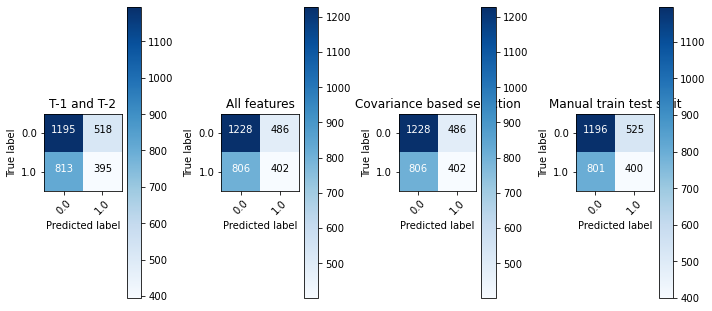

In [7]:
#As we can see we do not need to balance our data
#By using cross validation lets check which approach works the best
train_features=[x_train_1,x_train_all,x_train_cov,features_train_1]
train_target=[y_train_1,y_train_all,y_train_cov,target_train_1]
approaches=['T-1 and T-2','All features','Covariance based selection','Manual train test split']
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
plt.figure(figsize=(10,5))

classes = y_train_1.unique()

# KNN
for i in range(len(train_features)):
    plt.subplot(1,4,i+1)
    estimator=KNeighborsClassifier(9)
    prediction = cross_val_predict(estimator, train_features[i], train_target[i], cv=cv)
    cnf_matrix = confusion_matrix( train_target[i], prediction, labels=classes)
    np.set_printoptions(precision=2)
    plot_confusion_matrix(cnf_matrix, classes=classes, title=approaches[i])
    rep_knn = classification_report( train_target[i], prediction)
    print(approaches[i])
    print(rep_knn)
    print()


<h3> As we can see the All features approaches and Covariance based selection work the same </h3>
<h3>By testing the All features approach works better for the following steps </h3>

In [8]:
#Lets try to preprocess the values
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

stScaler=StandardScaler()
min_max_Scaler=MinMaxScaler()

In [9]:
x_train_all=stScaler.fit_transform(x_train_all)
x_test_all=stScaler.transform(x_test_all)

All features preprocessed
              precision    recall  f1-score   support

           0       0.72      0.73      0.73      1714
           1       0.61      0.60      0.61      1208

    accuracy                           0.68      2922
   macro avg       0.67      0.67      0.67      2922
weighted avg       0.68      0.68      0.68      2922




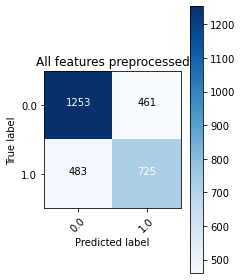

In [10]:
plt.subplot(1,2,1)
estimator=KNeighborsClassifier(9)
prediction = cross_val_predict(estimator, x_train_all, y_train_all, cv=cv)
cnf_matrix = confusion_matrix( y_train_all, prediction, labels=classes)
np.set_printoptions(precision=2)
plot_confusion_matrix(cnf_matrix, classes=classes, title='All features preprocessed')
rep_knn = classification_report( y_train_all, prediction)
print("All features preprocessed")
print(rep_knn)
print()

All features preprocessed
              precision    recall  f1-score   support

           0       0.77      0.74      0.75       450
           1       0.61      0.64      0.63       281

    accuracy                           0.70       731
   macro avg       0.69      0.69      0.69       731
weighted avg       0.71      0.70      0.70       731




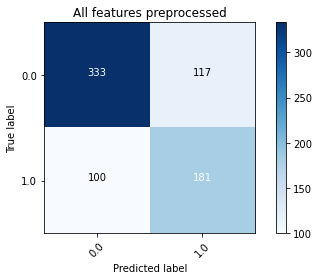

In [11]:
#lets test our model with our test set

estimator.fit(x_train_all,y_train_all)
prediction=estimator.predict(x_test_all)
cnf_matrix = confusion_matrix( y_test_all, prediction, labels=classes)
np.set_printoptions(precision=2)
plot_confusion_matrix(cnf_matrix, classes=classes, title='All features preprocessed')
rep_knn = classification_report( y_test_all, prediction)
print("All features preprocessed")
print(rep_knn)
print()


<h3> lets find the best k </h3>

In [12]:
k=list(range(1,15))
weight= ['uniform', 'distance']
metrics=['euclidean','manhattan','chebyshev','minkowski']

param_grid = dict(n_neighbors=k, weights=weight, metric=metrics)
print(param_grid)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14], 'weights': ['uniform', 'distance'], 'metric': ['euclidean', 'manhattan', 'chebyshev', 'minkowski']}


In [13]:
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid, cv=10, scoring='recall',n_jobs=-1,return_train_score=True)
grid.fit(x_train_all, y_train_all)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan', 'chebyshev',
                                    'minkowski'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14],
                         'weights': ['uniform', 'distance']},
             return_train_score=True, scoring='recall')

All features preprocessed
              precision    recall  f1-score   support

           0       0.77      0.74      0.75       450
           1       0.61      0.64      0.63       281

    accuracy                           0.70       731
   macro avg       0.69      0.69      0.69       731
weighted avg       0.71      0.70      0.70       731




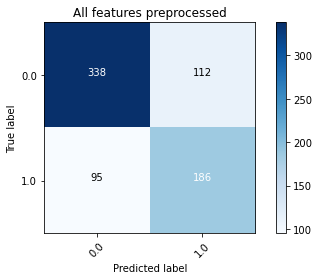

In [14]:
from sklearn.metrics import recall_score

pred=grid.predict(x_test_all)
cnf_matrix = confusion_matrix( y_test_all, pred, labels=classes)
np.set_printoptions(precision=2)
plot_confusion_matrix(cnf_matrix, classes=classes, title='All features preprocessed')
rep_knn = classification_report( y_test_all, prediction)
print("All features preprocessed")
print(rep_knn)
print()


In [15]:
grid.best_score_

0.6441046831955923

In [16]:
grid.best_estimator_

KNeighborsClassifier(metric='manhattan', n_neighbors=10, weights='distance')

<h2> Lets try to increase recall by changing the way the target value is binned </h2>

In [17]:
data = pd.read_csv(r'D:\user\OneDrive\Desktop\data_mining\try.csv').drop(['Unnamed: 0','Var_tot_tot_indx',
                                                                                                    'binary_thunderstorm',
                                                                                                   'Totals_idx_cat'
                                                                                                    ,'target+1'],axis=1)
data=data.dropna()
data_features=data.drop('binary_severe_thunderstorm',axis=1)
data_target=data['binary_severe_thunderstorm']


In [18]:
#all features 
x_train, x_test, y_train, y_test = train_test_split(data_features, data_target, stratify=data_target, test_size=0.2, random_state=42)

In [19]:
y_train.value_counts()

0    2695
1     226
Name: binary_severe_thunderstorm, dtype: int64

In [20]:
#in this case we need to balance our data
#using undersampler will decrease to much the amount of values and will prevent us from hyperparameters optimization
#using a oversampler may also lead to not so high qualitt data so lets try the hybrid approach
from sklearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE


knn = KNeighborsClassifier()
#over = RandomOverSampler(sampling_strategy=0.4)
#under = RandomUnderSampler(sampling_strategy=0.5)


#x_train, y_train = over.fit_resample(x_train, y_train)
#x_train, y_train = under.fit_resample(x_train, y_train)


y_train.value_counts()

0    2695
1     226
Name: binary_severe_thunderstorm, dtype: int64

In [21]:
#x_train_sc=stScaler.fit_transform(x_train)
#x_test_sc=stScaler.transform(x_test)

In [22]:
grid = GridSearchCV(knn, param_grid, cv=10, scoring='recall',n_jobs=-1,return_train_score=True)
grid.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan', 'chebyshev',
                                    'minkowski'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14],
                         'weights': ['uniform', 'distance']},
             return_train_score=True, scoring='recall')

In [23]:
grid.best_score_

0.07984189723320159

In [24]:
grid.best_estimator_

KNeighborsClassifier(metric='euclidean', n_neighbors=1)

All features preprocessed
              precision    recall  f1-score   support

           0       0.93      0.60      0.73       674
           1       0.09      0.46      0.15        57

    accuracy                           0.59       731
   macro avg       0.51      0.53      0.44       731
weighted avg       0.86      0.59      0.68       731




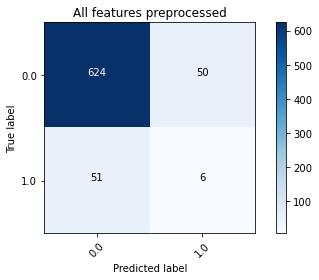

In [25]:
from sklearn.metrics import recall_score

pred=grid.predict(x_test)
cnf_matrix = confusion_matrix( y_test, pred, labels=classes)
np.set_printoptions(precision=2)
plot_confusion_matrix(cnf_matrix, classes=classes, title='All features preprocessed')
rep_knn = classification_report( y_test, prediction)
print("All features preprocessed")
print(rep_knn)
print()
